In [53]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [54]:
#Step 1: splitting dataset into training/testing sets
base_path = './data_folder'
emotions = ['angry', 'sad', 'happy', 'fear']

data = []

for emotion in emotions:
    folder_path = os.path.join(base_path, emotion)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        data.append([file_path, emotion])

data = pd.DataFrame(data, columns=['file_path', 'emotion'])
train_data, test_data = train_test_split(data, test_size=0.3, stratify=data['emotion'], random_state=42)

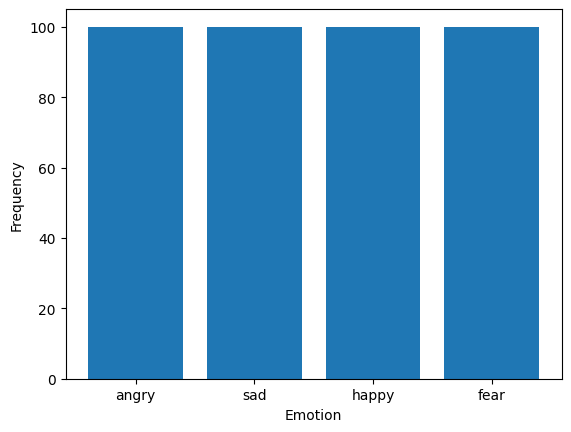

sample audio: ./data_folder\angry\YAF_size_angry.wav


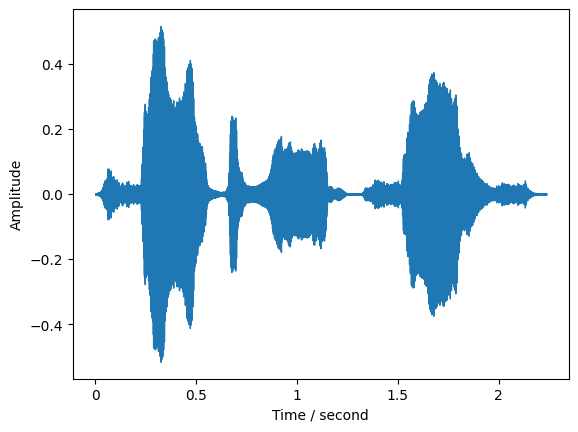

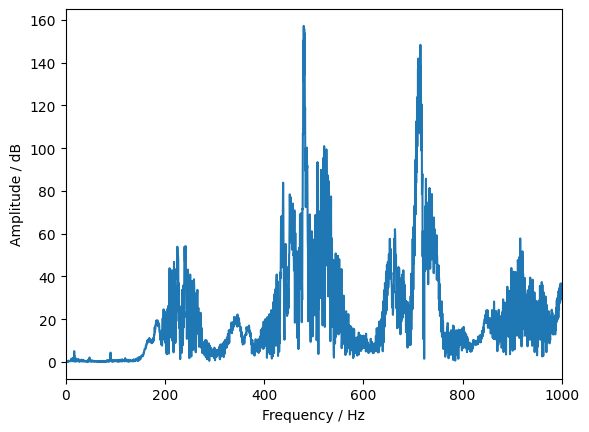

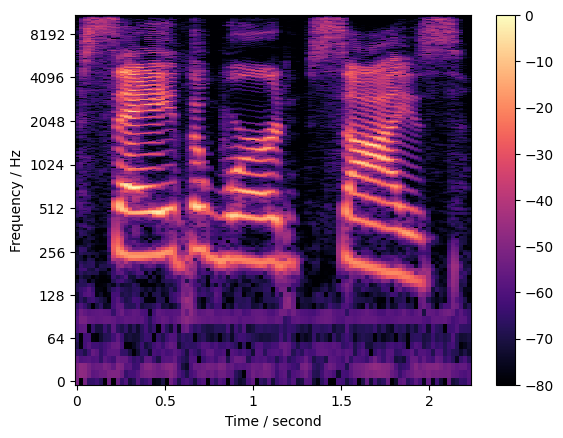

In [55]:
#Step 2: Exploratory data analysis

# Visualize label distribution
emotion_counts = data['emotion'].value_counts()
plt.figure()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.show()

# Selecting random sample audio and listening to it
sample_audio_path = data.iloc[58]['file_path']
print(f"sample audio: {sample_audio_path}")

# Load and plot audio in the time domain
signal, sample_rate = librosa.load(sample_audio_path)
plt.figure()
librosa.display.waveshow(y=signal, sr=sample_rate)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.show()

# Plot audio in the frequency domain
k = np.arange(len(signal))
T = len(signal) / sample_rate
freq = k / T
DATA_0 = np.fft.fft(signal)
abs_DATA_0 = abs(DATA_0)

plt.figure()
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.xlim([0, 1000])
plt.show()

# Plot the time-frequency variation (spectrogram) of the audio using STFT
D = librosa.stft(signal)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db, x_axis='time', y_axis='log')
plt.colorbar()
plt.xlabel("Time / second")
plt.ylabel("Frequency / Hz")
plt.show()

[0.00071245 0.00397844 0.01098523 0.01440855 0.01133632 0.00834437
 0.00715478 0.00688385 0.00602024 0.01233294 0.04568053 0.07109876
 0.09350294 0.10424924 0.10174632 0.08273823 0.0582826  0.0486356
 0.05181247 0.06455032 0.07411009 0.05748662 0.03474577 0.02594905
 0.01413123 0.00544203 0.00325218 0.00276631 0.02045736 0.04947498
 0.05010093 0.0255162  0.0112151  0.00856627 0.00910149 0.01077815
 0.01221185 0.02127274 0.03871746 0.04423763 0.03895478 0.03542625
 0.03668581 0.03552302 0.03509215 0.03465412 0.03534995 0.03604594
 0.03563441 0.02950002 0.01313081 0.00556599 0.005031   0.00355579
 0.00114714 0.0002479  0.00046611 0.00244179 0.00465976 0.00669497
 0.00904871 0.00876653 0.00774839 0.00720912 0.00768103 0.01532167
 0.03486589 0.05143073 0.06015627 0.05935119 0.06018387 0.07065932
 0.08013197 0.07844968 0.07376138 0.06396272 0.05098322 0.03990124
 0.02893142 0.02200755 0.01858919 0.016527   0.01363319 0.00968255
 0.00646472 0.00490995 0.00582786 0.00692986 0.00713565 0.00665

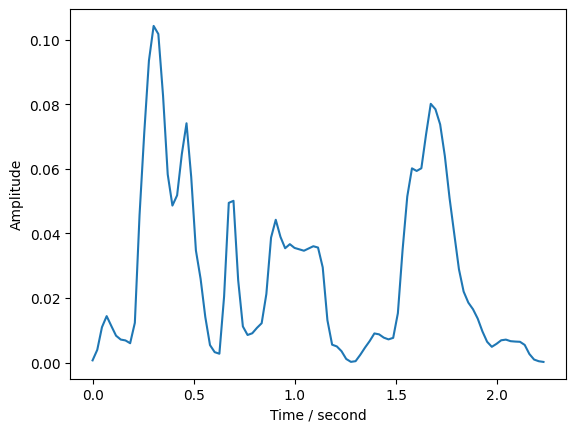

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6   
0 -470.171631 -361.320282 -338.825592 -362.509949 -394.494019 -420.578522  \
1   14.984516  -46.318695  -85.456573  -95.903122  -93.194778  -92.313774   
2  -11.661579   12.490284   41.503731   64.125336   57.647949   45.885071   
3   12.907119    4.431901   -5.815430  -18.026039  -21.522200  -20.915710   
4  -13.332659  -13.470386   -9.231510    0.530217   19.417789   18.102211   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -423.079834 -412.787720 -392.855042 -255.160706 -157.228958 -138.281403  
1  -89.799500  -85.100479  -64.884201   11.480923   35.669975   45.369247  
2   36.611237   29.894897   39.511589   17.149439  -40.922329  -82.807175  
3  -21.855167  -18.915089   -7.661720   -1.336632   23.722740   43.064247  
4   15.893174   21.683281   22.578266   13.050917  -15.168274  -44.279091  


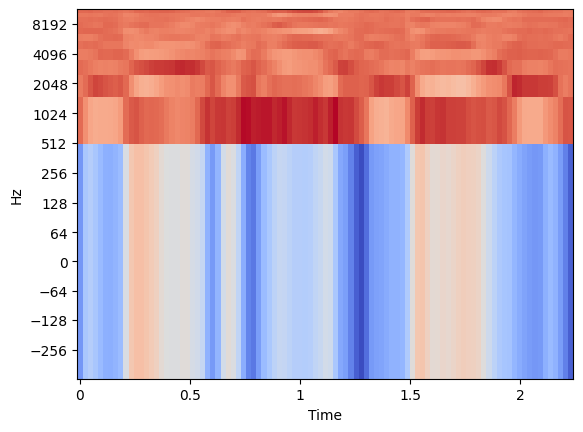

        ZCR
0  0.180664
1  0.353027
2  0.546387
3  0.691406
4  0.771973


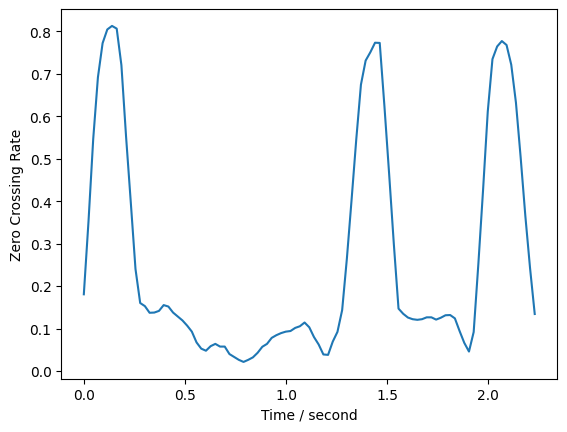

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7   
0  0.908793  0.716614  1.000000  0.883492  0.505960  0.227512  0.272937  \
1  1.000000  0.790684  0.967306  1.000000  0.920080  0.721005  0.826657   
2  0.756648  0.798058  0.630270  0.705666  1.000000  1.000000  1.000000   
3  0.482667  0.322463  0.190879  0.172804  0.321332  0.573220  0.734566   
4  0.375496  0.370234  0.245356  0.154855  0.224059  0.427524  0.923233   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.284823  0.457948   0.607955   0.868306   1.000000  
1  0.549999  0.677249   1.000000   1.000000   0.957730  
2  0.822103  0.862684   0.507942   0.351651   0.514631  
3  0.724140  0.715253   0.136145   0.043840   0.073390  
4  1.000000  1.000000   0.103470   0.019934   0.019085  


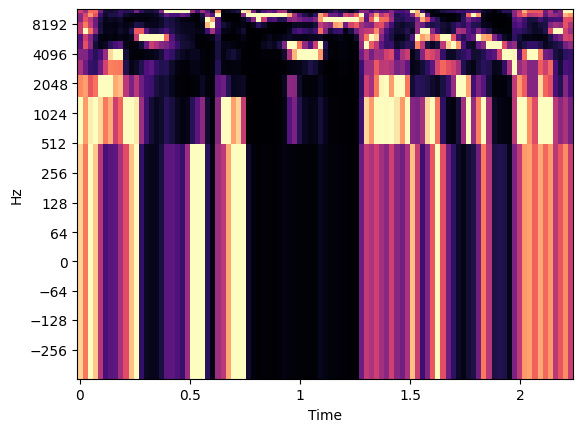

   Mel_Spectrogram_1  Mel_Spectrogram_2  Mel_Spectrogram_3  Mel_Spectrogram_4   
0           0.000088           0.000265           0.000242           0.000174  \
1           0.000172           0.000438           0.000339           0.000150   
2           0.000145           0.000428           0.000383           0.000109   
3           0.000159           0.000472           0.000361           0.000231   
4           0.000065           0.000248           0.000207           0.000118   

   Mel_Spectrogram_5  Mel_Spectrogram_6  Mel_Spectrogram_7  Mel_Spectrogram_8   
0           0.000118           0.000076           0.000070           0.000091  \
1           0.000051           0.000020           0.000019           0.000028   
2           0.000048           0.000049           0.000055           0.000045   
3           0.000097           0.000059           0.000072           0.000079   
4           0.000059           0.000036           0.000053           0.000090   

   Mel_Spectrogram_9  Mel_

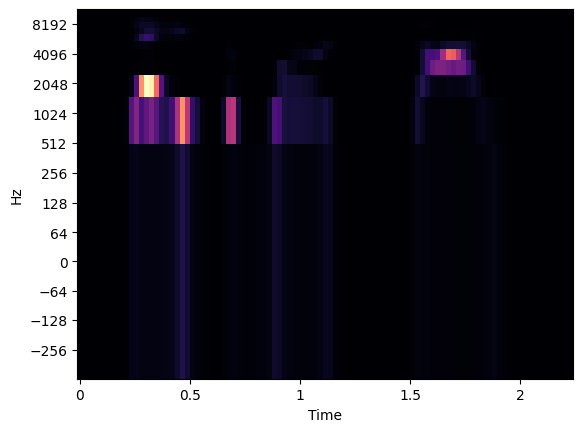

In [56]:
#Step 3: Acoustic Feature Extraction

#Extracting and displaying features of one sample audio
#loudness
df_loudness = pd.DataFrame()
S, phase = librosa.magphase(librosa.stft(signal))
rms = librosa.feature.rms(S=S)
print(rms[0])
df_loudness['Loudness'] = rms[0]
print(df_loudness.head(5))
plt.figure(4)
times = librosa.times_like(rms)
plt.plot(times, rms[0])
plt.xlabel("Time / second")
plt.ylabel("Amplitude")
plt.show()

#mel-frequency cepstral coefficients
df_mfccs = pd.DataFrame()
mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
for n_mfcc in range(len(mfccs)):
    df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
print(df_mfccs.head(5))
plt.figure(5)
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

#zero crossing rate
df_zero_crossing_rate = pd.DataFrame()
zcr = librosa.feature.zero_crossing_rate(y=signal)
df_zero_crossing_rate['ZCR'] = zcr[0]
print(df_zero_crossing_rate.head(5))
plt.figure(6)
times = librosa.times_like(zcr)
plt.plot(times, zcr[0])
plt.xlabel("Time / second")
plt.ylabel("Zero Crossing Rate")
plt.show()

#chroma
df_chroma = pd.DataFrame()
chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
for n_chroma in range(len(chromagram)):
    df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
print(df_chroma.head(5))
plt.figure(7)
librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

#mel spectrogram
df_mel_spectrogram = pd.DataFrame()
mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
for n_mel in range(len(mel_spectrogram)):
    df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
print(df_mel_spectrogram.head(5))
plt.figure(8)
librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.show()

#Extracting features of every audio file amd combining them
def extract_features(file_path):
    signal, sample_rate = librosa.load(file_path)

    # Feature extraction
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    
    # Combine all features
    features = np.concatenate([rms, mfccs, zcr, chromagram, mel_spectrogram], axis=0)
    return features.mean(axis=1)

train_data['features'] = train_data['file_path'].apply(extract_features)
test_data['features'] = test_data['file_path'].apply(extract_features)

In [57]:
#Step 4: Feature Post-processing

# Step 1: Feature Matrix Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
train_feature_matrix = np.array(train_data['features'].tolist())
test_feature_matrix = np.array(test_data['features'].tolist())
train_data_scaled = scaler.fit_transform(train_feature_matrix)
test_data_scaled = scaler.transform(test_feature_matrix)

# Step 2: Feature Concatenation
# This step was done in step 3

# Step 3: Feature Averaging
window_size = 100
window_samples = int(sample_rate * window_size / 1000) 

def average_over_window(feature_matrix, window_samples):
    num_windows = feature_matrix.shape[1] // window_samples
    return np.mean(feature_matrix[:, :num_windows * window_samples].reshape(-1, window_samples), axis=1)

train_data_avg = average_over_window(train_data_scaled, window_samples)
test_data_avg = average_over_window(test_data_scaled, window_samples)



SVC Report:
               precision    recall  f1-score   support

       angry       1.00      1.00      1.00        30
        fear       1.00      1.00      1.00        30
       happy       1.00      1.00      1.00        30
         sad       1.00      1.00      1.00        30

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

RFC Report:
               precision    recall  f1-score   support

       angry       1.00      0.97      0.98        30
        fear       0.97      1.00      0.98        30
       happy       1.00      1.00      1.00        30
         sad       1.00      1.00      1.00        30

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

NB Report:
               precision    recall  f1-score   support

       angry       1.00      1.00    

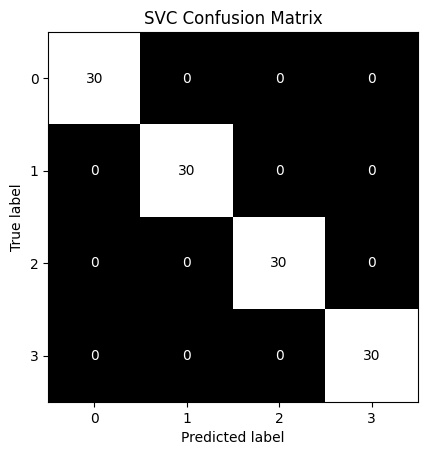

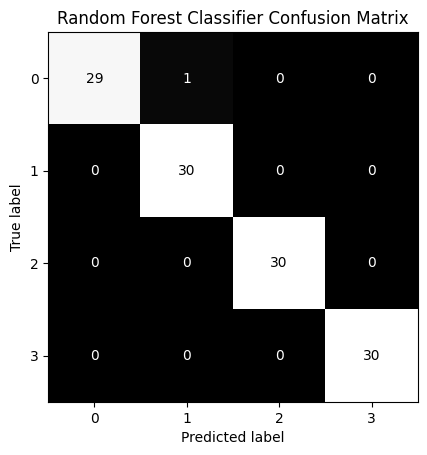

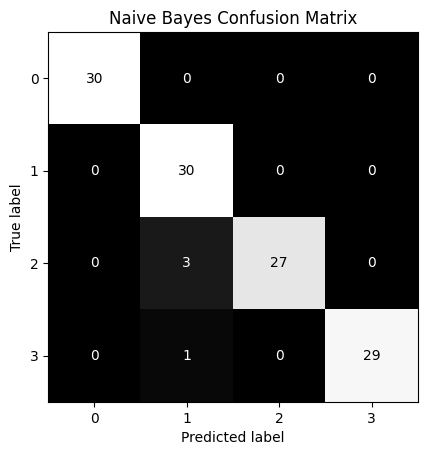

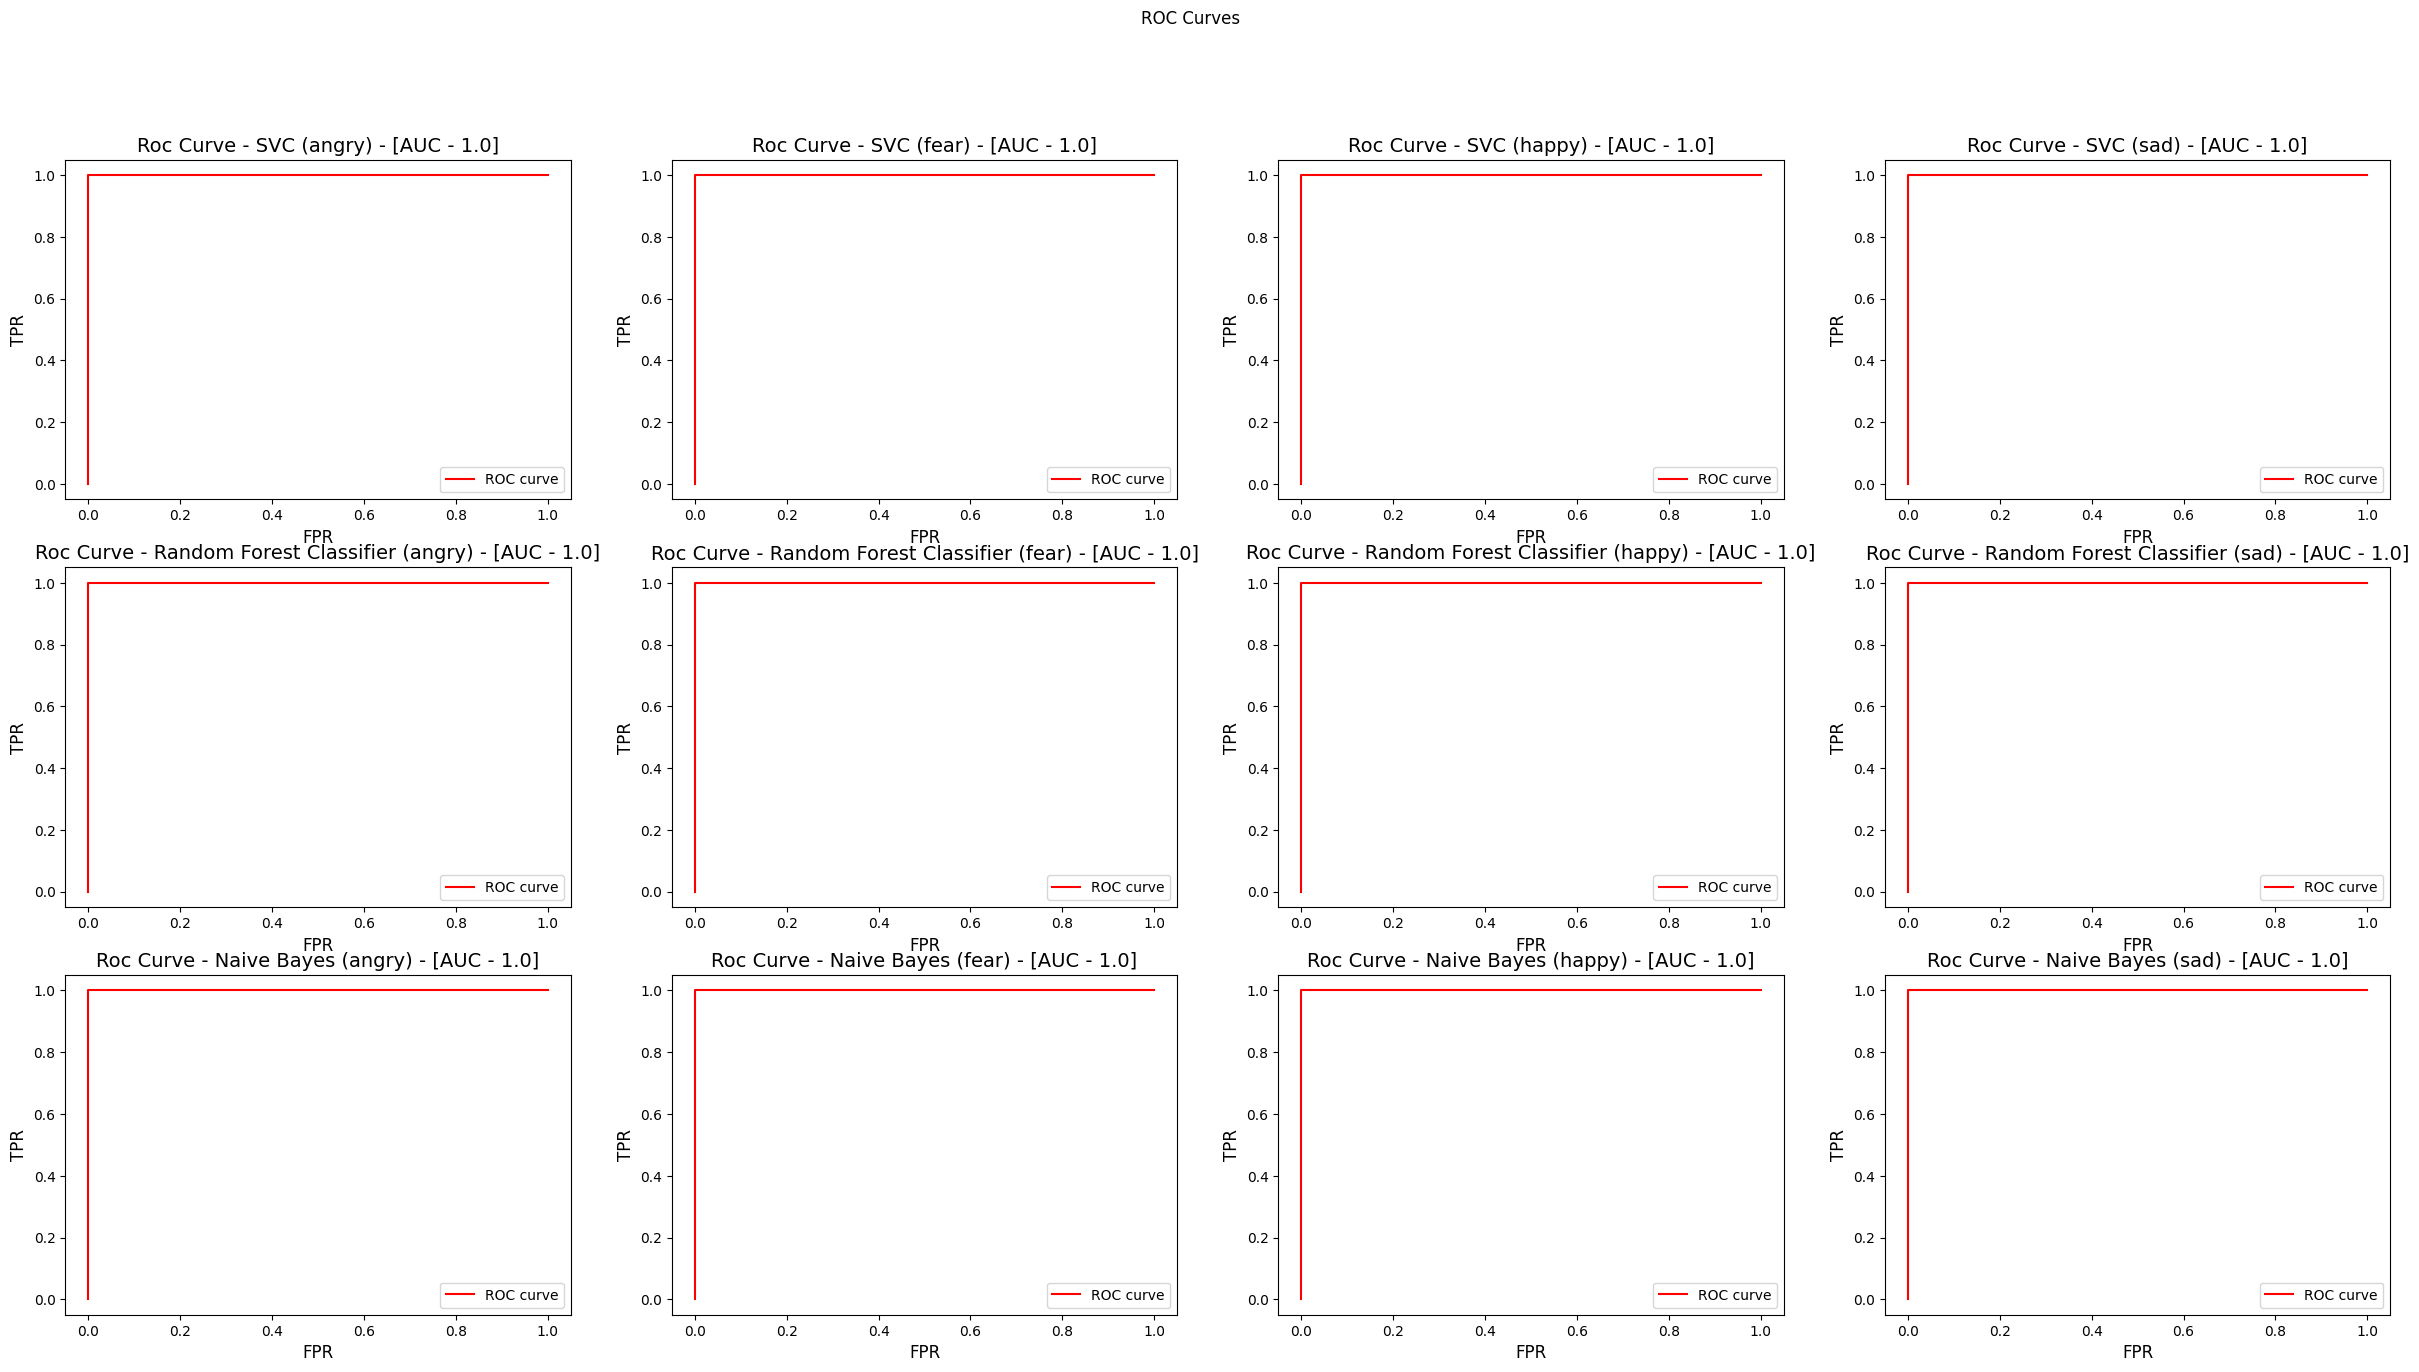

In [58]:
#Step 5: Build your audio emotion recognition model
y_train = train_data['emotion'].values
y_test = test_data['emotion'].values

svc = SVC()
rfc = RandomForestClassifier()
nb = GaussianNB()

# Train classifiers
svc.fit(train_data_scaled, y_train)
rfc.fit(train_data_scaled, y_train)
nb.fit(train_data_scaled, y_train)

# Predict emotions test data
svc_preds = svc.predict(test_data_scaled)
rfc_preds = rfc.predict(test_data_scaled)
nb_preds = nb.predict(test_data_scaled)

# Evaluate classifiers
svc_report = classification_report(y_test, svc_preds)
rfc_report = classification_report(y_test, rfc_preds)
nb_report = classification_report(y_test, nb_preds)

print("SVC Report:\n", svc_report)
print("RFC Report:\n", rfc_report)
print("NB Report:\n", nb_report)


models = ['SVC', 'Random Forest Classifier', 'Naive Bayes']
predictions = [svc_preds, rfc_preds, nb_preds]
pred_probabilities = [svc.decision_function(test_data_scaled), rfc.predict_proba(test_data_scaled), nb.predict_proba(test_data_scaled)]


classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)


for model, prediction in zip(models, predictions):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.show()

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    for i, class_name in enumerate(classes):
        fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], pred_proba[:, i])
        auc_score = auc(fpr, tpr)
        plt.subplot(3, len(classes), plot_index)
        plt.plot(fpr, tpr, 'r', label='ROC curve')
        plt.title(f'Roc Curve - {model} ({class_name}) - [AUC - {auc_score}]', fontsize=14)
        plt.xlabel('FPR', fontsize=12)
        plt.ylabel('TPR', fontsize=12)
        plt.legend()
        plot_index += 1

plt.show()